# GDS Project Data collection and proccesing

### Environment setup
+ Dokumentieren 

## Analyse
### Korrelation zwischen
+ Saisonal
+ Tageszeit (Peaks zum beispiel)
+ Wochentag
+ (Lichtverhältnisse)
+ Stadtteil
+ Beteiligte Fahrzeugtypen
### Cluster Analyse
+ K nearest or anything
### Further ideas
+ Monte Carlo test

In [78]:
# csv file laden
import geopandas as gpd
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr, chi2_contingency
import matplotlib.pyplot as plt

In [17]:
df = gpd.read_file("work/gds/Data/Shapefile/Unfallorte2021_LinRef.shp") #("Data/Shapefile/Unfallorte2021_LinRef.shp") #"work/gds/Data/Shapefile/Unfallorte2021_LinRef.shp"

In [19]:
df.shape

(233208, 26)

In [21]:
df.head()
df_bike = df[df["IstRad"] == "1"]

In [4]:
df_bike.size

1864148

In [22]:
df_bike.shape

(71698, 26)

In [5]:
df_bike.head()

,OBJECTID,UIDENTSTLA,ULAND,UREGBEZ,UKREIS,UGEMEINDE,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,...,IstFuss,IstKrad,IstGkfz,IstSonstig,LINREFX,LINREFY,XGCSWGS84,YGCSWGS84,USTRZUSTAN,geometry
2,3,01210610181013902021,01,0,61,007,2021,06,13,5,...,0,0,0,1,527231.388501,5.972658e+06,9.414457,53.901645,0,POINT (527231.389 5972658.256)
3,4,01210524161013132021,01,0,53,041,2021,05,11,2,...,0,0,0,0,614902.973625,5.963897e+06,10.745101,53.810913,0,POINT (614902.974 5963896.514)
4,5,01210529152013382022,01,0,55,032,2021,05,15,7,...,0,0,0,0,617331.180263,5.996138e+06,10.794357,54.100018,0,POINT (617331.180 5996138.283)
6,7,01210512171013412021,01,0,56,037,2021,05,14,4,...,0,0,0,0,540082.958405,5.947625e+06,9.606790,53.675817,0,POINT (540082.958 5947624.890)
7,8,01210325105132862021,01,0,56,043,2021,03,06,5,...,0,0,0,0,555471.603000,5.943956e+06,9.839070,53.641432,0,POINT (555471.603 5943955.564)


In [23]:
df_bike.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

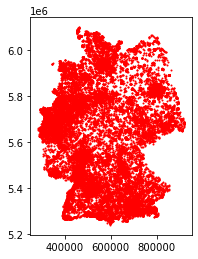

In [24]:
# plot points in df_bike
df_bike.plot(marker="o", color="red", markersize=1)

In [25]:
df_bike_hh = df_bike[df_bike["ULAND"] == "02"]

In [26]:
df_bike_hh.shape

(2455, 26)

In [9]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

In [4]:
# get districts of hamburg from shapefile
df_districts = gpd.read_file("work/gds/Data/hh_districts/Stadtteile_Hamburg.shp") # ("Data/hh_districts/Stadtteile_Hamburg.shp")

In [5]:
df_districts.crs

<Derived Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot:>

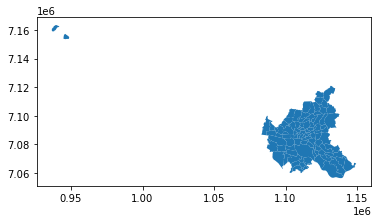

In [6]:
df_districts.plot()

In [11]:
df_bike_hh.crs

<Derived Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [12]:
df_districts = df_districts.to_crs("EPSG:25832")

In [13]:
# import ctx
import contextily as ctx
import matplotlib.pyplot as plt

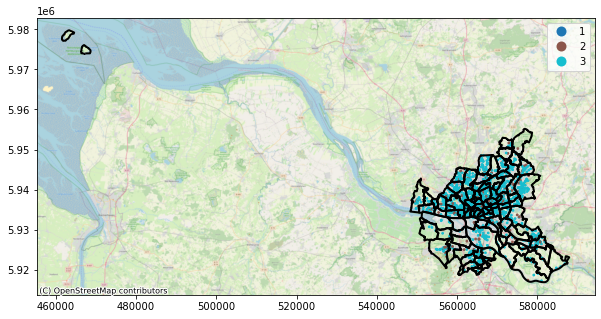

In [14]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=3)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


In [15]:
df_bike_hh.columns

Index(['OBJECTID', 'UIDENTSTLA', 'ULAND', 'UREGBEZ', 'UKREIS', 'UGEMEINDE',
       'UJAHR', 'UMONAT', 'USTUNDE', 'UWOCHENTAG', 'UKATEGORIE', 'UART',
       'UTYP1', 'ULICHTVERH', 'IstRad', 'IstPKW', 'IstFuss', 'IstKrad',
       'IstGkfz', 'IstSonstig', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'USTRZUSTAN', 'geometry'],
      dtype='object')

## Exploratory Data Analysis 

In [29]:
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig", "USTRZUSTAN"]

# filter by cols
df_bike_hh_corr = df_bike_hh[cols]

In [42]:
for col in cols:
    df_bike_hh_corr[col] = df_bike_hh_corr[col].astype('int')

/tmp/ipykernel_101/4230592474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bike_hh_corr[col] = df_bike_hh_corr[col].astype('int')


In [44]:
df_bike_hh_corr.dtypes

UKATEGORIE    int64
UART          int64
UMONAT        int64
USTUNDE       int64
UWOCHENTAG    int64
UTYP1         int64
ULICHTVERH    int64
IstPKW        int64
IstKrad       int64
IstGkfz       int64
IstSonstig    int64
USTRZUSTAN    int64
dtype: object

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

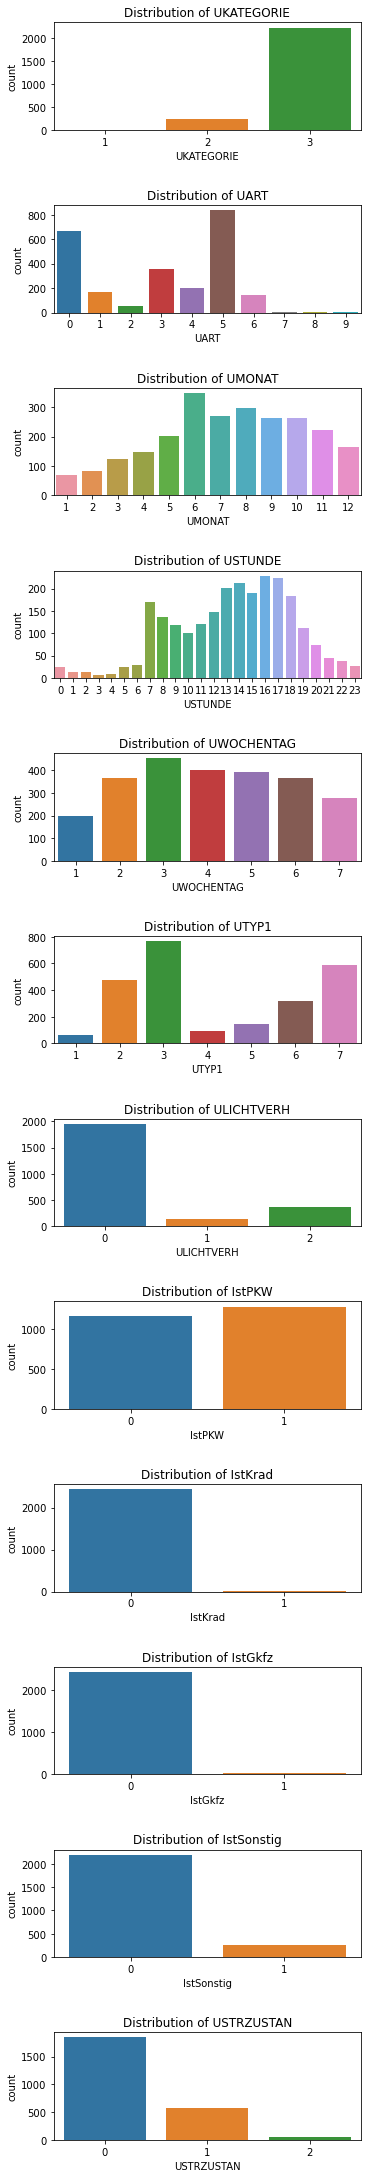

In [51]:
fig, axs = plt.subplots(len(cols), figsize = (5,30))
plt.tight_layout()
plt.subplots_adjust(hspace=0.7)

for i, col in enumerate(cols):
    sns.countplot(df_bike_hh_corr[col], ax = axs[i])
    #axs[i].hist(df_bike_hh_corr[col])
    axs[i].set_title(f'Distribution of {col}')
    
plt.show()

#### Correlation Analysis 
Metric columns: UMONAT (?), USTUNDE (?), IstPKW, IstKrad, IstGkfz, IstSonstig

Ordinal columns: UKATEGORIE, ULICHTVERH, USTRZUSTAN

Nominal columns: UART, UWOCHENTAG, UTYP1

In [105]:
# empty correlation matrix
corr = np.zeros((len(cols), len(cols)))

# Lists to identify scale level of features below
metric = ["UMONAT", "USTUNDE", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]
ordinal = ["UKATEGORIE", "ULICHTVERH", "USTRZUSTAN"]
nominal = ["UART", "UWOCHENTAG", "UTYP1"]

# For loop over all columns
for i, col1 in enumerate(cols):
    for j, col2 in enumerate(cols):
        # If both columns are metric
        if col1 in metric and col2 in metric:
            # Compute pearsons correlation coefficient
            corr[i,j] = pearsonr(df_bike_hh_corr[col1], df_bike_hh_corr[col2])[0]
        # If both columns are ordinal or one is ordinal and the other metric
        elif col1 in metric + ordinal and col2 in metric + ordinal:
            # Compute spearmans correlation coefficient
            corr[i,j] = spearmanr(df_bike_hh_corr[col1], df_bike_hh_corr[col2])[0]
        # For all other combinations (anything that involves at least one nominal variable)
        else:
            # If possible compute Cramer's V
            try:
                # Create contingency table
                arr = np.array(pd.crosstab(index=df_bike_hh_corr[col1], columns=df_bike_hh_corr[col2]))
                # Compute Cramer's V via chi squared divided by product of number of observations and minimum of rows or columns -1 in contingency table
                # Finally square root
                corr[i,j] = np.sqrt(chi2_contingency(arr)[0]/(df_bike_hh_corr.shape[0] * (min(arr.shape)-1)))
            # If requirements for chi squared are not met, replace value in correlation matrix with nan
            except ValueError:
                corr[i,j] = np.nan

In [106]:
corr_df = pd.DataFrame(corr, columns = cols, index = cols)
corr_df

,UKATEGORIE,UART,UMONAT,USTUNDE,UWOCHENTAG,UTYP1,ULICHTVERH,IstPKW,IstKrad,IstGkfz,IstSonstig,USTRZUSTAN
UKATEGORIE,1.000000,0.065377,0.011443,-0.007444,0.057930,0.057116,0.004282,0.049074,0.029275,-0.053836,0.015454,0.001665
UART,0.065377,1.000000,0.077458,0.120483,0.071055,0.645227,0.094588,0.635574,0.058644,0.118584,0.126212,0.112888
UMONAT,0.011443,0.077458,1.000000,-0.049407,0.096505,0.080561,0.165269,0.004826,-0.013668,0.001364,0.012856,0.208492
USTUNDE,-0.007444,0.120483,-0.049407,1.000000,0.146635,0.132695,0.181074,0.012614,-0.006850,-0.008004,-0.007069,-0.066629
UWOCHENTAG,0.057930,0.071055,0.096505,0.146635,1.000000,0.074396,0.068321,0.054472,0.045648,0.074098,0.056229,0.063773
UTYP1,0.057116,0.645227,0.080561,0.132695,0.074396,1.000000,0.094381,0.621949,0.056266,0.093730,0.158573,0.123807
ULICHTVERH,0.004282,0.094588,0.165269,0.181074,0.068321,0.094381,1.000000,-0.042192,0.011180,-0.017333,-0.007893,0.177113
IstPKW,0.049074,0.635574,0.004826,0.012614,0.054472,0.621949,-0.042192,1.000000,-0.085905,-0.116564,-0.339482,-0.005712
IstKrad,0.029275,0.058644,-0.013668,-0.006850,0.045648,0.056266,0.011180,-0.085905,1.000000,-0.010080,-0.031191,-0.021158
IstGkfz,-0.053836,0.118584,0.001364,-0.008004,0.074098,0.093730,-0.017333,-0.116564,-0.010080,1.000000,-0.038280,-0.021765


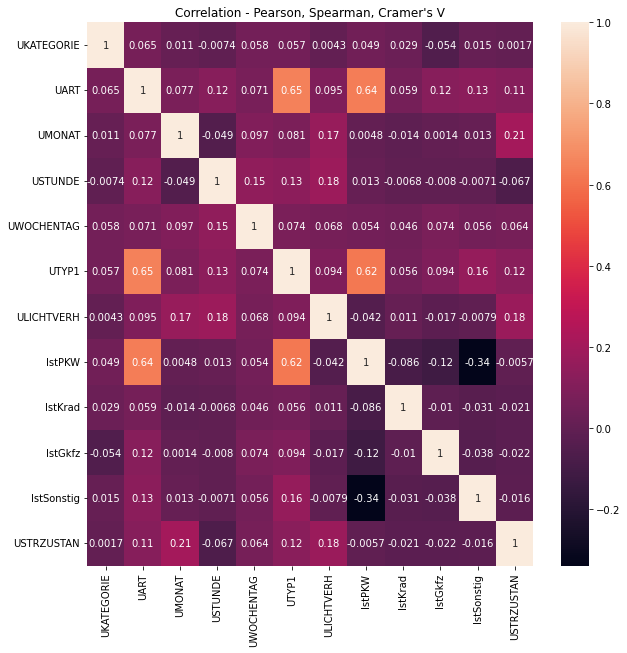

In [110]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, ax=ax)
plt.title("Correlation - Pearson, Spearman, Cramer's V")
plt.show()

##### Correlation with Spearman

In [94]:
# correlation matrix of bike accidents in hamburg
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig", "USTRZUSTAN"]

# filter by cols
df_bike_hh_corr = df_bike_hh[cols]

# convert to int
df_bike_hh_corr = df_bike_hh_corr.astype(int)

# calculate correlation matrix for categorical variables
corr = df_bike_hh_corr.corr(method="spearman")


In [28]:
corr

,UKATEGORIE,UART,UMONAT,USTUNDE,UWOCHENTAG,UTYP1,ULICHTVERH,IstPKW,IstKrad,IstGkfz,IstSonstig,USTRZUSTAN
UKATEGORIE,1.000000,0.012461,0.011443,-0.007444,-0.008974,-0.027908,0.004282,0.049074,0.029275,-0.053836,0.015454,0.001665
UART,0.012461,1.000000,-0.039441,-0.007978,0.050172,-0.426924,-0.079056,0.330156,0.016108,-0.014264,0.006139,-0.068299
UMONAT,0.011443,-0.039441,1.000000,-0.060132,-0.059842,-0.029006,0.165269,0.008190,-0.012014,0.002998,0.015651,0.208492
USTUNDE,-0.007444,-0.007978,-0.060132,1.000000,0.003039,0.020680,0.181074,-0.000519,-0.008425,-0.011553,-0.017097,-0.066629
UWOCHENTAG,-0.008974,0.050172,-0.059842,0.003039,1.000000,-0.033804,-0.007024,-0.011759,0.012539,0.025208,0.020285,-0.013600
UTYP1,-0.027908,-0.426924,-0.029006,0.020680,-0.033804,1.000000,0.012458,-0.443717,-0.018372,-0.026596,-0.044571,0.003043
ULICHTVERH,0.004282,-0.079056,0.165269,0.181074,-0.007024,0.012458,1.000000,-0.042192,0.011180,-0.017333,-0.007893,0.177113
IstPKW,0.049074,0.330156,0.008190,-0.000519,-0.011759,-0.443717,-0.042192,1.000000,-0.085905,-0.116564,-0.339482,-0.005712
IstKrad,0.029275,0.016108,-0.012014,-0.008425,0.012539,-0.018372,0.011180,-0.085905,1.000000,-0.010080,-0.031191,-0.021158
IstGkfz,-0.053836,-0.014264,0.002998,-0.011553,0.025208,-0.026596,-0.017333,-0.116564,-0.010080,1.000000,-0.038280,-0.021765


<AxesSubplot:>

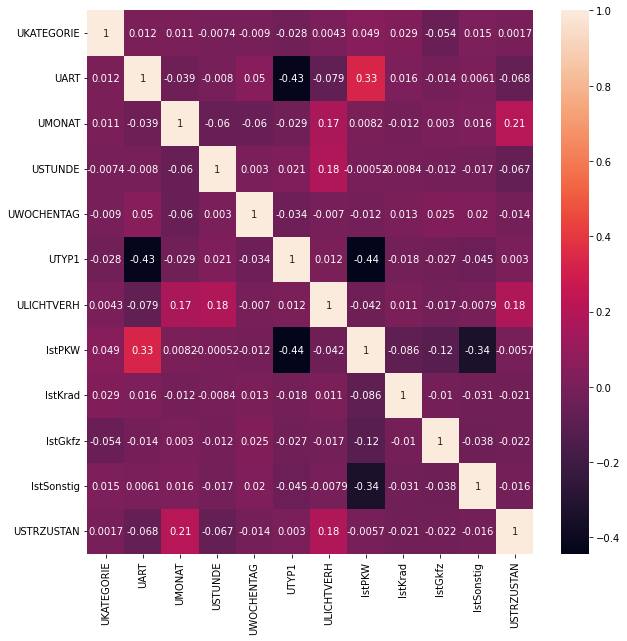

In [95]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plot correlation matrix
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot=True, ax=ax)
plt.title('Correlation - Spearman')
plt.show()

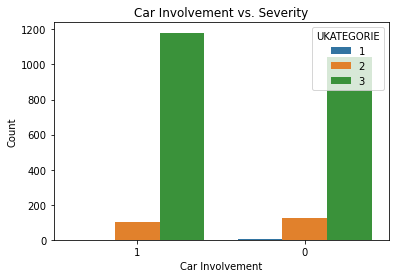

In [19]:
car_involvement = df_bike_hh['IstPKW']
severity = df_bike_hh['UKATEGORIE']
# sort severity
severity = severity.sort_values()

# Create a bar chart
sns.countplot(x=car_involvement, hue=severity)
plt.xlabel('Car Involvement')
plt.ylabel('Count')
plt.title('Car Involvement vs. Severity')
plt.show()

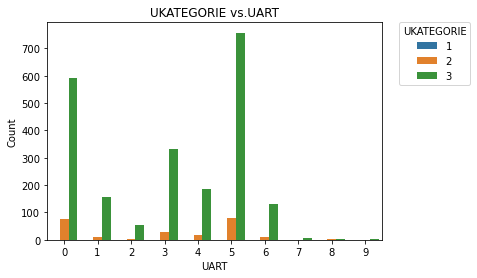

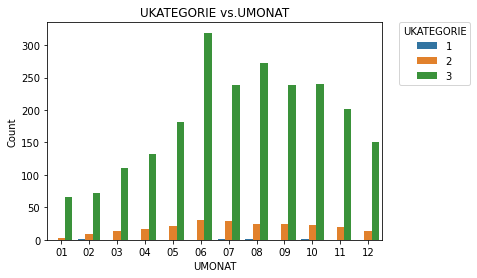

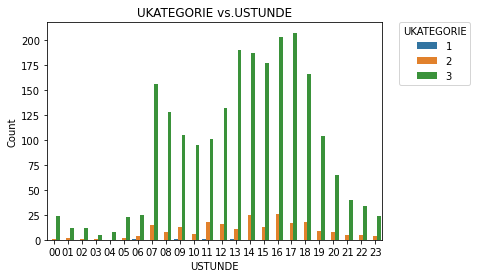

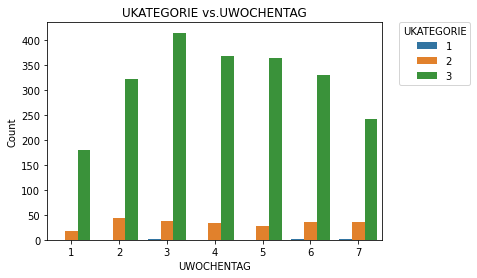

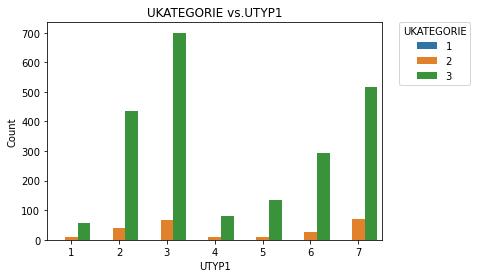

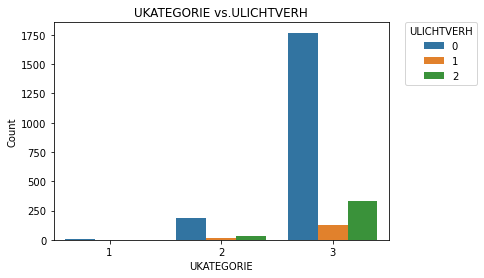

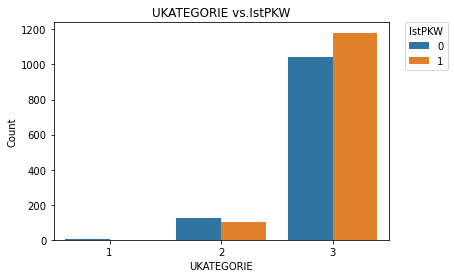

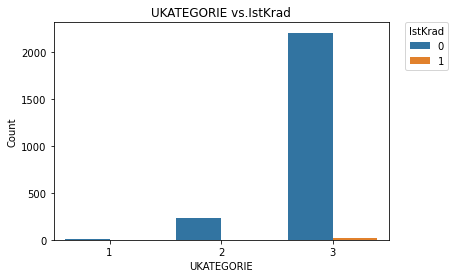

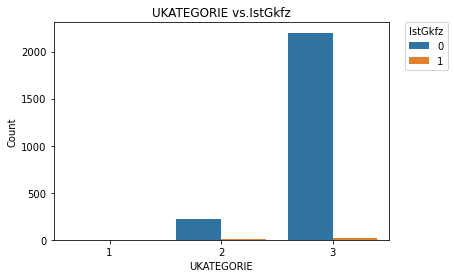

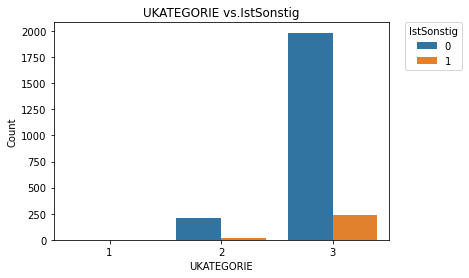

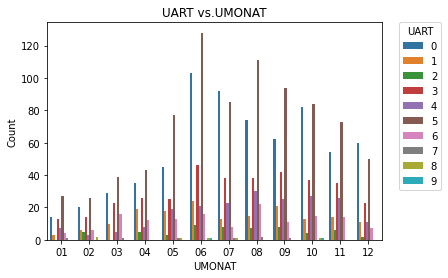

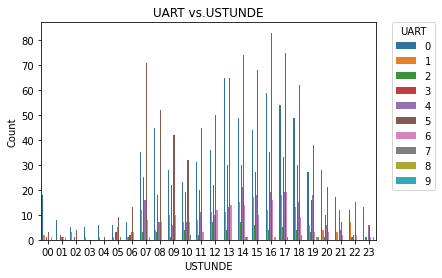

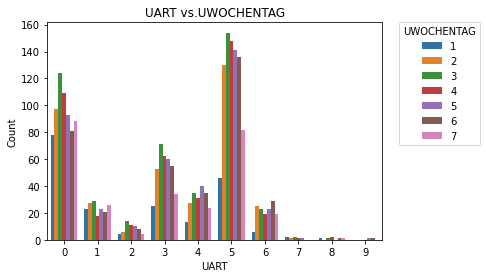

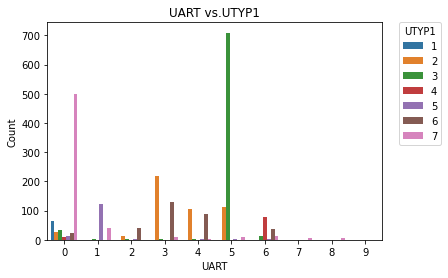

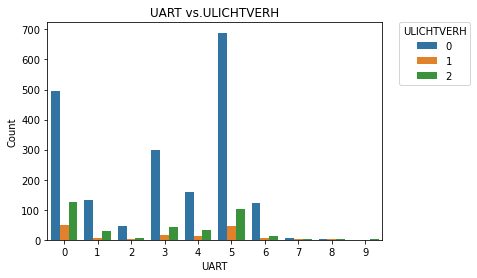

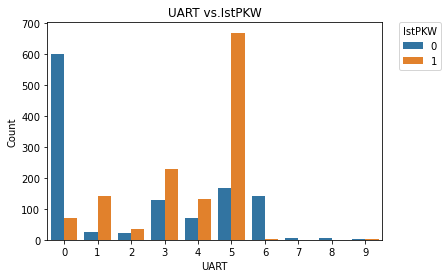

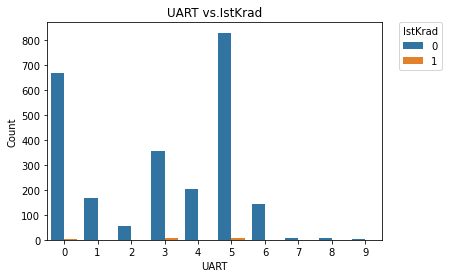

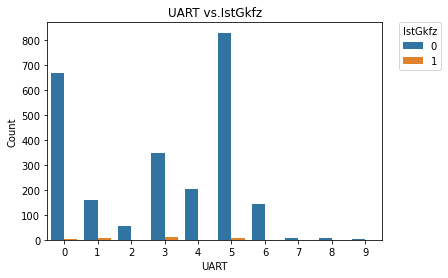

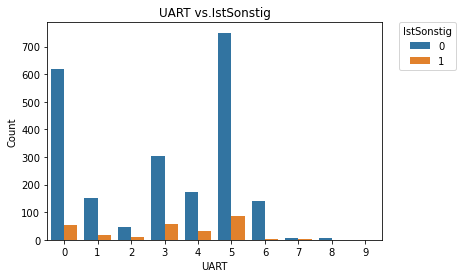

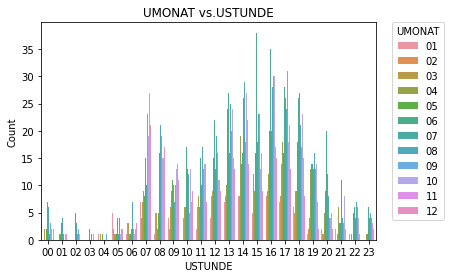

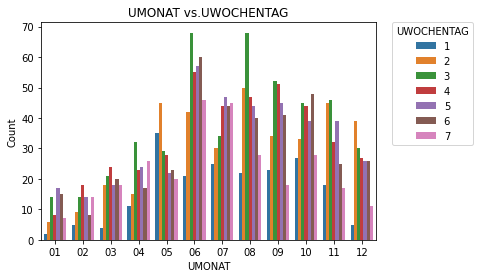

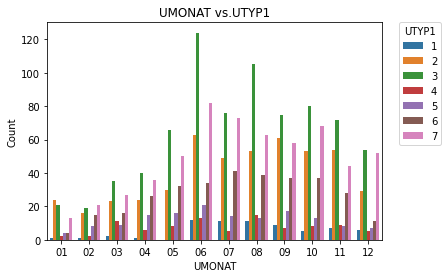

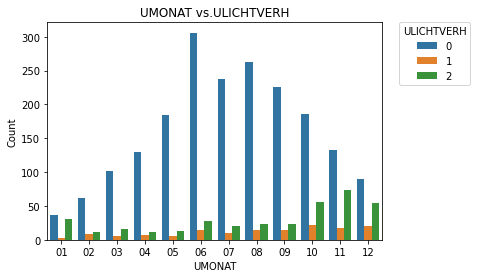

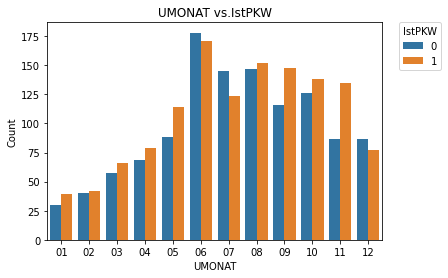

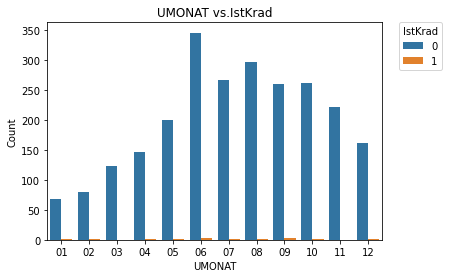

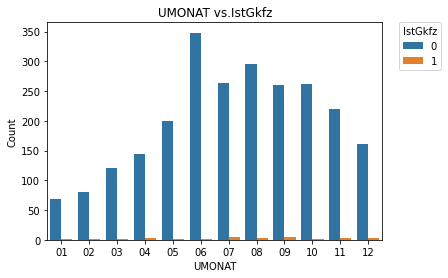

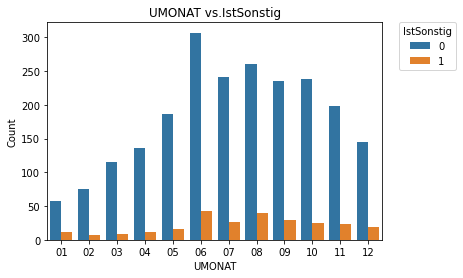

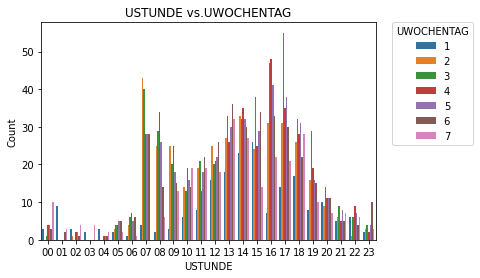

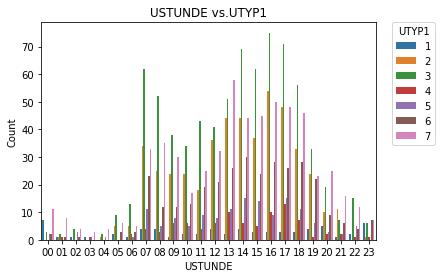

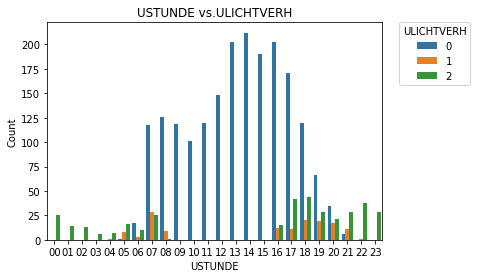

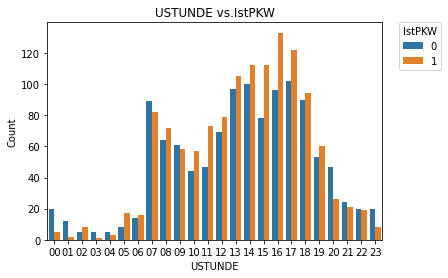

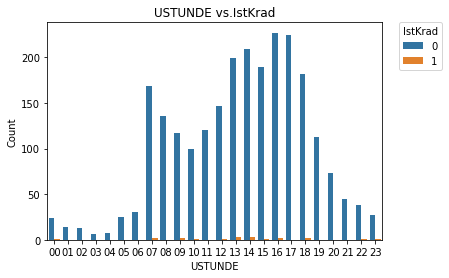

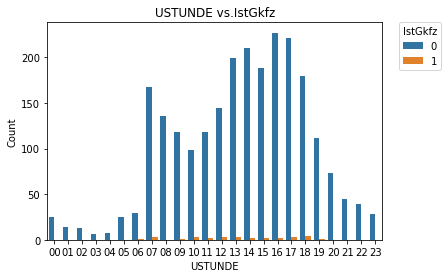

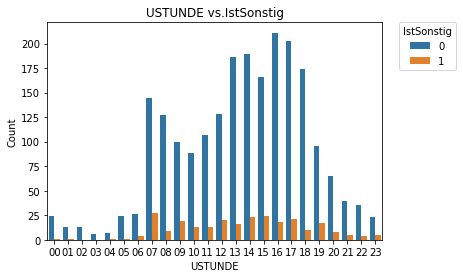

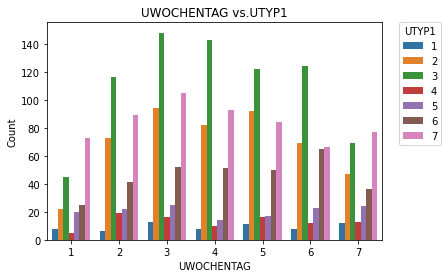

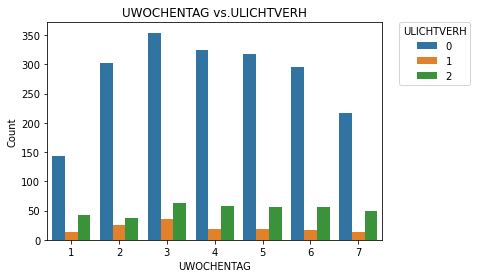

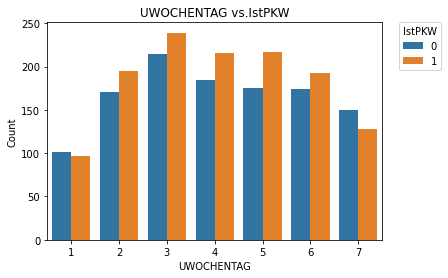

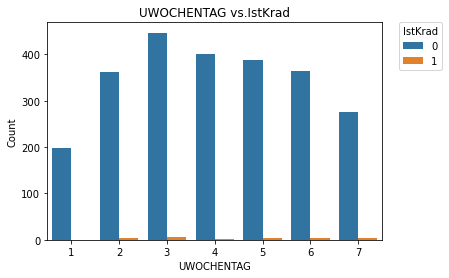

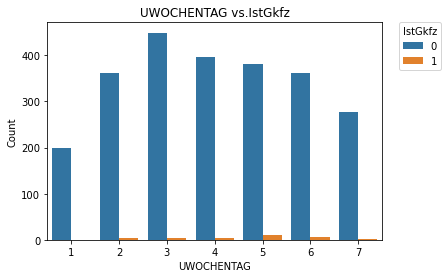

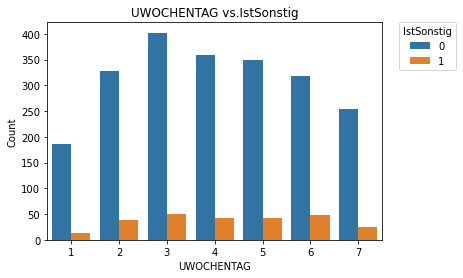

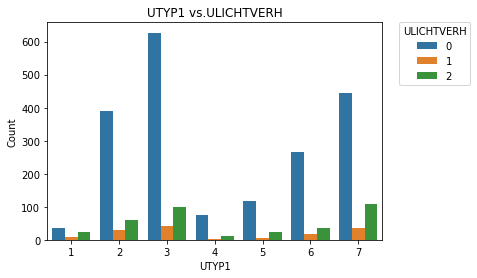

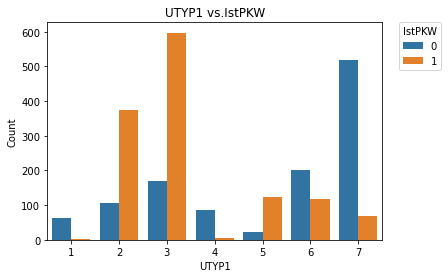

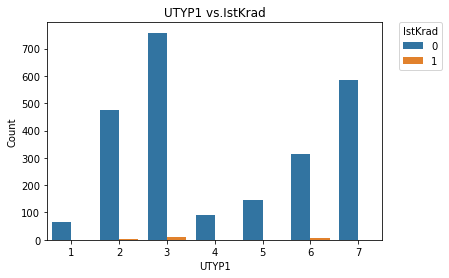

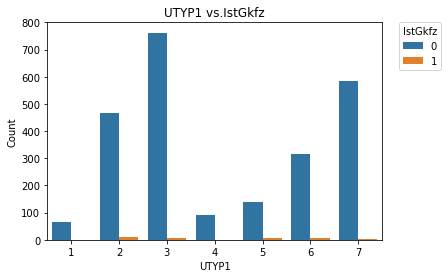

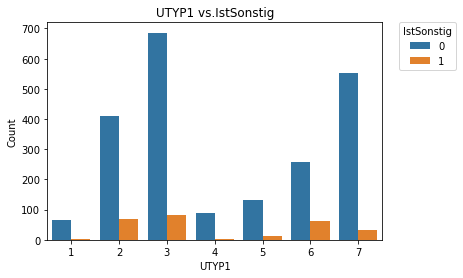

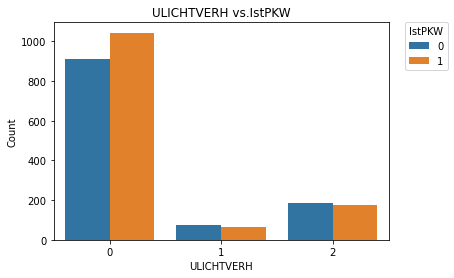

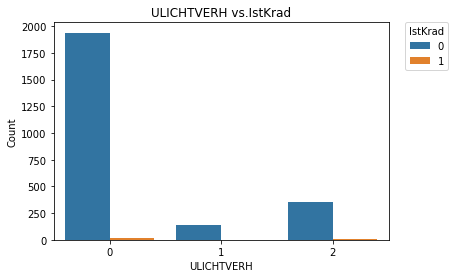

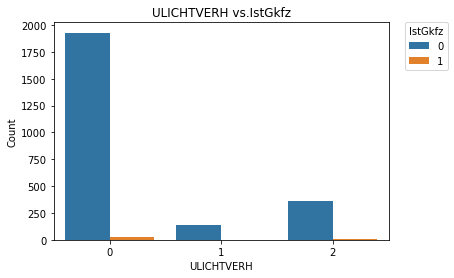

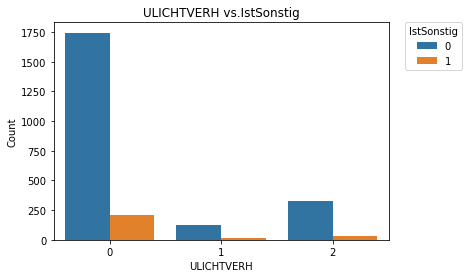

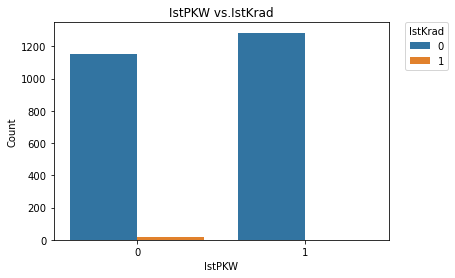

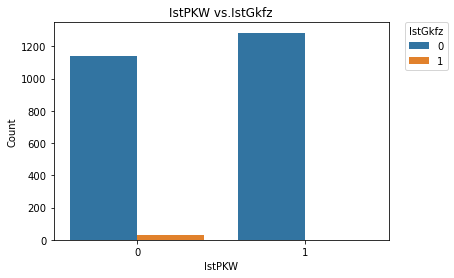

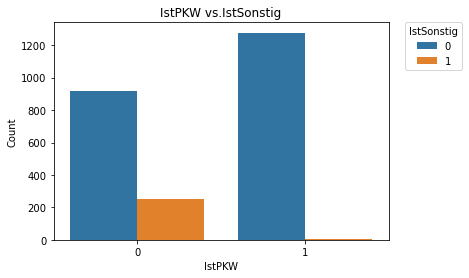

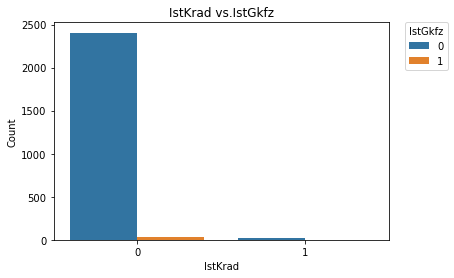

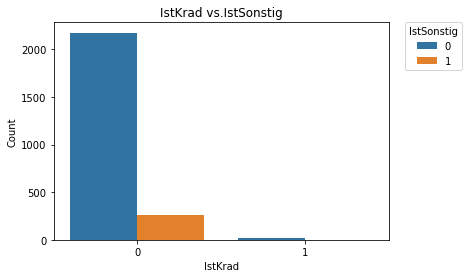

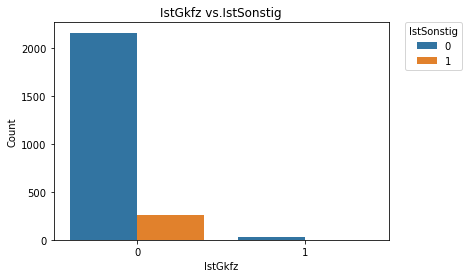

In [20]:
# plot categorical variables vs other categorical variables
# columns to use
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

for col1 in cols:
    # continue from col1 + 1
    for col2 in cols[cols.index(col1) + 1:]:
        # plot categorical variables vs other categorical variables
        x = df_bike_hh[col1]
        y = df_bike_hh[col2]
        x = x.sort_values()
        y = y.sort_values()
        # Create a bar chart
        # use shorter as hue
        shorter = x if len(x.unique()) < len(y.unique()) else y
        longer = y if len(x.unique()) < len(y.unique()) else x
        sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
        # place legend outside of plot showing title of hue

        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
        plt.xlabel(longer.name)
        plt.ylabel('Count')
        plt.title(col1 + ' vs.' + col2)
        plt.show()

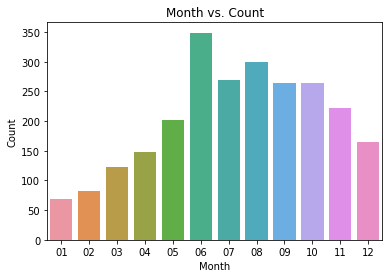

In [21]:
# plot count of values for "UMONAT"
x = df_bike_hh["UMONAT"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month vs. Count')
plt.show()

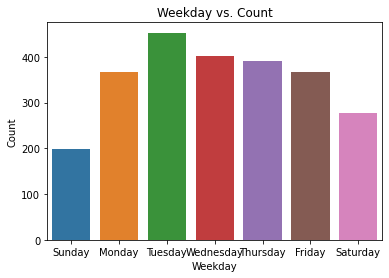

In [22]:
# plot count of values for "UWOCHENTAG"
x = df_bike_hh["UWOCHENTAG"]
x = x.sort_values()
days = {1: "Sunday",
        2: "Monday",
        3: "Tuesday",
        4: "Wednesday",
        5: "Thursday",
        6: "Friday",
        7: "Saturday"}

sns.countplot(x=x)
plt.xticks([0, 1, 2, 3, 4, 5, 6], [days[1], days[2], days[3], days[4], days[5], days[6], days[7]])
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Weekday vs. Count')
plt.show()

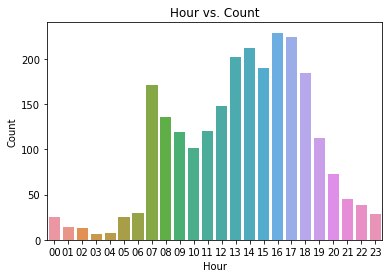

In [23]:
# plot count of values for "USTUNDE"
x = df_bike_hh["USTUNDE"]
x = x.sort_values()
sns.countplot(x=x)
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Hour vs. Count')
plt.show()

In [24]:
# calculate ratio of "IstPKW" == 1 and "IstPKW" == 0 for each "STUNDE"
df_bike_hh["IstPKW"] = df_bike_hh["IstPKW"].astype(int)

ratio_dict = {}

for hour in df_bike_hh["USTUNDE"].unique():
    df_hour = df_bike_hh[df_bike_hh["USTUNDE"] == hour]
    # calculate ratio
    ratio = df_hour[df_hour["IstPKW"] == 1].size / df_hour[df_hour["IstPKW"] == 0].size
    ratio_dict[hour] = ratio
    # print("Ratio of IstPKW == 1 and IstPKW == 0 for hour {}: {}".format(hour, ratio))

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


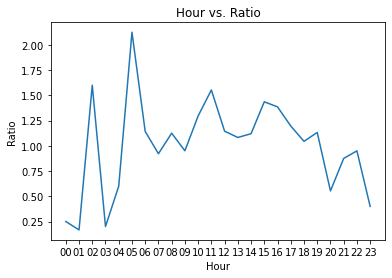

In [25]:
# plot ratio_dict
# sort by key (hour)
ratio_dict = {k: v for k, v in sorted(ratio_dict.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict.keys()), y=list(ratio_dict.values()))
plt.xlabel('Hour')
plt.ylabel('Ratio')
plt.title('Hour vs. Ratio')
plt.show()

In [26]:
# split "UMONAT" into seasons
df_bike_hh["UMONAT"] = df_bike_hh["UMONAT"].astype(int)
df_bike_hh["season"] = df_bike_hh["UMONAT"].apply(lambda x: "winter" if x in [1, 2, 12] else "spring" if x in [3, 4, 5] else "summer" if x in [6, 7, 8] else "autumn")

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


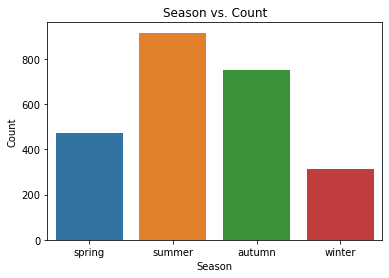

In [27]:
# plot count of values for "season"
x = df_bike_hh["season"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
sns.countplot(x=x)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Season vs. Count')
plt.show()

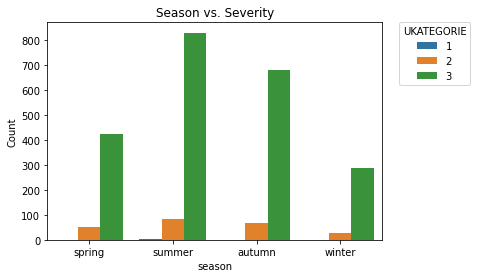

In [28]:
# plot season vs "UKATEGORIE"
x = df_bike_hh["season"]
y = df_bike_hh["UKATEGORIE"]
sorter = ["spring", "summer", "autumn", "winter"]
x = x.sort_values(key=lambda column: column.map(lambda e: sorter.index(e)))
y = y.sort_values()
# Create a bar chart
# use shorter as hue
shorter = x if len(x.unique()) < len(y.unique()) else y
longer = y if len(x.unique()) < len(y.unique()) else x
sns.countplot(x=longer, hue=shorter, data=df_bike_hh)
# place legend outside of plot showing title of hue
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title=shorter.name)
plt.xlabel(longer.name)
plt.ylabel('Count')
plt.title('Season vs. Severity')
plt.show()


In [29]:
# season vs ratio of severity

ratio_dict_severity = {}
for season in df_bike_hh["season"].unique():
    df_season = df_bike_hh[df_bike_hh["season"] == season]
    sum = df_season.size
    fatal_ratio = df_season[df_season["UKATEGORIE"] == "1"].size / sum
    severe_ratio = df_season[df_season["UKATEGORIE"] == "2"].size / sum
    slight_ratio = df_season[df_season["UKATEGORIE"] == "3"].size / sum
    
    ratio = [fatal_ratio, severe_ratio, slight_ratio]
    ratio_dict_severity[season] = ratio


In [30]:
ratio_dict_severity

{'autumn': [0.0013333333333333333, 0.09066666666666667, 0.908],
 'winter': [0.0031746031746031746, 0.08253968253968254, 0.9142857142857143],
 'summer': [0.0021810250817884407, 0.0916030534351145, 0.906215921483097],
 'spring': [0.0, 0.10570824524312897, 0.8942917547568711]}

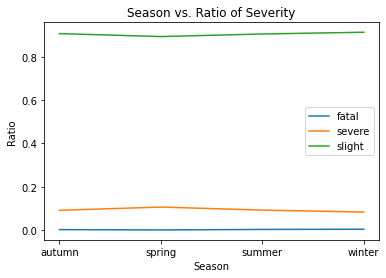

In [31]:
# plot ratio_dict_severity
# sort by key (season)
ratio_dict_severity = {k: v for k, v in sorted(ratio_dict_severity.items(), key=lambda item: item[0])}
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[0] for x in list(ratio_dict_severity.values())], label="fatal")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[1] for x in list(ratio_dict_severity.values())], label="severe")
sns.lineplot(x=list(ratio_dict_severity.keys()), y=[x[2] for x in list(ratio_dict_severity.values())], label="slight")
plt.xlabel('Season')
plt.ylabel('Ratio')
plt.title('Season vs. Ratio of Severity')
plt.show()

### Cramers V

In [32]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

In [33]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [34]:
cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

for col1 in cols:
    for col2 in cols[cols.index(col1) + 1:]:
        corr = cramers_v(df_bike_hh[col1], df_bike_hh[col2])
        if corr > 0.1:
            print("Correlation between {} and {}: {}".format(col1, col2, corr))

Correlation between UART and UTYP1: 0.6431658799428369
Correlation between UART and IstPKW: 0.632810826130587
Correlation between UART and IstGkfz: 0.10197526719262816
Correlation between UART and IstSonstig: 0.11075621299927914
Correlation between UMONAT and ULICHTVERH: 0.22238954429473853
Correlation between USTUNDE and UWOCHENTAG: 0.1102688274967186
Correlation between USTUNDE and ULICHTVERH: 0.5337590481319345
Correlation between USTUNDE and IstPKW: 0.11182352749623142
Correlation between UTYP1 and IstPKW: 0.6201064819169803
Correlation between UTYP1 and IstSonstig: 0.15069718349795377
Correlation between IstPKW and IstGkfz: 0.11105462352768923
Correlation between IstPKW and IstSonstig: 0.3376227347491467


### Point Pattern Analysis

In [35]:
# detect islands in df_bike_hh geometry
# Create an empty GeoDataFrame to store the islands
islands = gpd.GeoDataFrame(columns=df_districts.columns)

# Loop over each polygon in the GeoDataFrame
for i, row in df_districts.iterrows():
    # Check if the polygon touches any other polygon
    touches = df_districts[df_districts.geometry.touches(row.geometry)]
    
    # If the polygon doesn't touch any other polygon, it's an island
    if touches.empty:
        # Add the island to the GeoDataFrame
        islands = islands.append(row, ignore_index=True)
        # remove the island from the original GeoDataFrame
        df_districts = df_districts.drop(i)

/tmp/ipykernel_1842/1165241472.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  islands = islands.append(row, ignore_index=True)


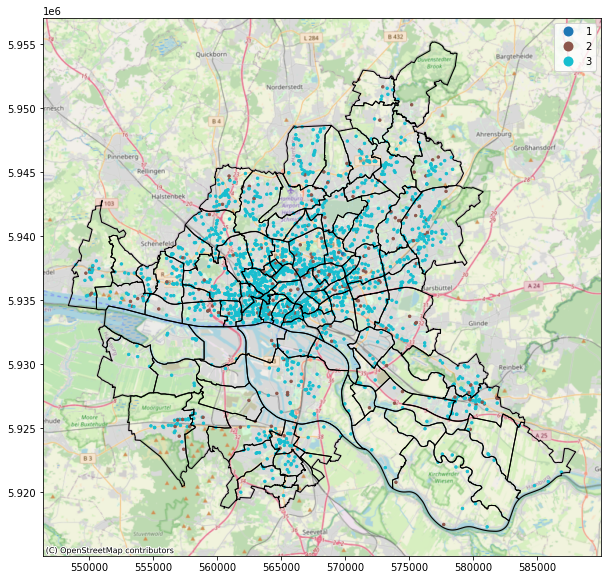

In [36]:
# color legend by 'UKATEGORIE'
fig, ax = plt.subplots(figsize=(10, 10))
df_bike_hh.plot(ax=ax, column="UKATEGORIE", legend=True, markersize=6)
# add districts
df_districts.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
# add basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=df_bike_hh.crs.to_string())


In [37]:
# add district to df_bike_hh based on geometry
df_bike_hh["district"] = df_bike_hh["geometry"].apply(lambda x: df_districts[df_districts.geometry.contains(x)]["bezirk_nam"].values[0])


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [38]:
# add id column for districs in df_bike_hh
df_bike_hh["district_id"] = df_bike_hh["district"].apply(lambda x: df_districts[df_districts["bezirk_nam"] == x]["bezirk"].values[0])

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [39]:

import pandas as pd
import esda
from pysal.lib import weights
from splot.esda import (
    moran_scatterplot, lisa_cluster, plot_local_autocorrelation, plot_moran
)
from splot.libpysal import plot_spatial_weights

In [40]:
cat_cols = ["UKATEGORIE", "UART", "UMONAT", "USTUNDE", "UWOCHENTAG", "UTYP1", "ULICHTVERH", "IstPKW", "IstKrad", "IstGkfz", "IstSonstig"]

In [41]:
for col in cat_cols:
    dummies = pd.get_dummies(df_bike_hh[col], prefix=col, prefix_sep='_')
    df_bike_hh = pd.concat([df_bike_hh, dummies], axis=1)
    df_bike_hh = df_bike_hh.drop(col, axis=1)

In [42]:
df_grouped = df_bike_hh.groupby(["district_id"]).sum()

In [43]:
df_districts

,OBJECTID,bezirk,bezirk_nam,stadtteil_,stadttei_1,stadttei_2,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,Hamburg-Mitte,Hamburg-Altstadt,02101,101,9028.180532,3.676562e+06,"POLYGON ((566655.103 5933760.301, 566722.625 5..."
1,2,1,Hamburg-Mitte,HafenCity,02102,102,13902.691334,6.860720e+06,"POLYGON ((566183.919 5932468.981, 566099.304 5..."
2,3,1,Hamburg-Mitte,Neustadt,02103,103,11133.923114,6.395226e+06,"POLYGON ((565841.224 5934181.092, 565729.797 5..."
3,4,1,Hamburg-Mitte,St. Pauli,02104,104,15968.675123,6.343533e+06,"POLYGON ((563834.747 5933258.107, 563765.973 5..."
4,5,1,Hamburg-Mitte,St. Georg,02105,105,9795.650670,5.155061e+06,"POLYGON ((567068.406 5933916.007, 567055.305 5..."
...,...,...,...,...,...,...,...,...,...
99,100,7,Harburg,Hausbruch,02713,713,34659.184329,2.770431e+07,"POLYGON ((559335.214 5925124.684, 559331.386 5..."
100,101,7,Harburg,Neugraben-Fischbek,02714,714,42482.635108,6.344999e+07,"POLYGON ((556513.916 5921502.868, 556488.926 5..."
101,102,7,Harburg,Francop,02715,715,23501.637669,2.486794e+07,"POLYGON ((558377.088 5930115.476, 558381.359 5..."
102,103,7,Harburg,Neuenfelde,02716,716,31946.432527,4.424464e+07,"POLYGON ((551927.877 5928219.428, 551922.431 5..."


In [44]:
# group df_districts by bezirk
# group the GeoDataFrame by the 'district_id' column and dissolve the geometries into a single geometry using the 'unary_union' method
district_geomtries = df_districts.groupby('bezirk')['geometry'].apply(lambda x: x.unary_union)

# convert the resulting series to a GeoDataFrame
dissolved_gdf = gpd.GeoDataFrame(geometry=district_geomtries)


In [45]:
dissolved_gdf

,geometry
bezirk,
1,"POLYGON ((566380.311 5925325.069, 566282.956 5..."
2,"POLYGON ((555651.304 5933510.967, 555337.017 5..."
3,"POLYGON ((565797.903 5934832.877, 565797.458 5..."
4,"POLYGON ((564391.545 5937420.714, 564382.192 5..."
5,"MULTIPOLYGON (((573346.824 5935754.906, 573342..."
6,"POLYGON ((573715.446 5920276.955, 573693.672 5..."
7,"POLYGON ((561453.250 5919328.943, 561178.819 5..."


In [46]:
# add geomtry from df_districts
df_grouped = df_grouped.merge(dissolved_gdf, left_on="district_id", right_on="bezirk")

In [47]:
df_grouped["district_id"] = df_grouped.index + 1


In [48]:
w = weights.Queen.from_dataframe(df_grouped, idVariable="district_id")

In [49]:
# Row standardize the matrix
w.transform = 'R'

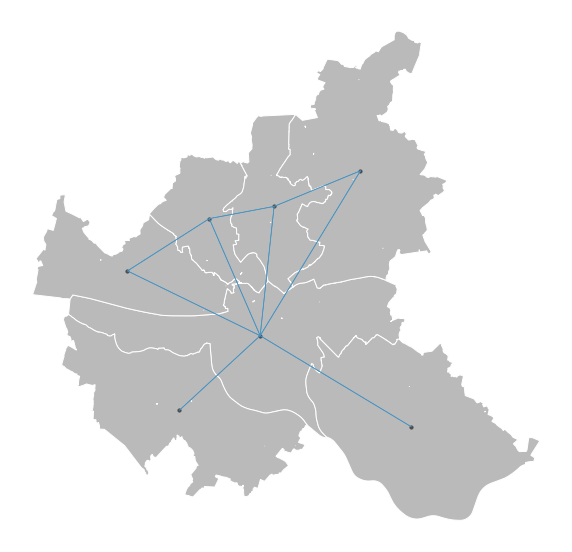

In [50]:
plot_spatial_weights(w, df_grouped, indexed_on="district_id");

In [55]:
df_grouped.columns

Index(['OBJECTID', 'LINREFX', 'LINREFY', 'XGCSWGS84', 'YGCSWGS84',
       'UKATEGORIE_1', 'UKATEGORIE_2', 'UKATEGORIE_3', 'UART_0', 'UART_1',
       'UART_2', 'UART_3', 'UART_4', 'UART_5', 'UART_6', 'UART_7', 'UART_8',
       'UART_9', 'UMONAT_1', 'UMONAT_2', 'UMONAT_3', 'UMONAT_4', 'UMONAT_5',
       'UMONAT_6', 'UMONAT_7', 'UMONAT_8', 'UMONAT_9', 'UMONAT_10',
       'UMONAT_11', 'UMONAT_12', 'USTUNDE_00', 'USTUNDE_01', 'USTUNDE_02',
       'USTUNDE_03', 'USTUNDE_04', 'USTUNDE_05', 'USTUNDE_06', 'USTUNDE_07',
       'USTUNDE_08', 'USTUNDE_09', 'USTUNDE_10', 'USTUNDE_11', 'USTUNDE_12',
       'USTUNDE_13', 'USTUNDE_14', 'USTUNDE_15', 'USTUNDE_16', 'USTUNDE_17',
       'USTUNDE_18', 'USTUNDE_19', 'USTUNDE_20', 'USTUNDE_21', 'USTUNDE_22',
       'USTUNDE_23', 'UWOCHENTAG_1', 'UWOCHENTAG_2', 'UWOCHENTAG_3',
       'UWOCHENTAG_4', 'UWOCHENTAG_5', 'UWOCHENTAG_6', 'UWOCHENTAG_7',
       'UTYP1_1', 'UTYP1_2', 'UTYP1_3', 'UTYP1_4', 'UTYP1_5', 'UTYP1_6',
       'UTYP1_7', 'ULICHTVERH_0', 'ULICH

In [58]:
df_grouped['w_IstPKW_1'] = weights.lag_spatial(w, df_grouped['IstPKW_1']) # we pass the weights object and the column with values to base the spatial lag on

In [60]:
df_grouped[['district_id', 'IstPKW_1', 'w_IstPKW_1']].head()

,district_id,IstPKW_1,w_IstPKW_1
0,1,207.0,179.666667
1,2,198.0,214.000000
2,3,221.0,228.000000
3,4,279.0,218.333333
4,5,227.0,243.000000


In [61]:
df_grouped['IstPKW_1_std'] = (df_grouped['IstPKW_1'] - df_grouped['IstPKW_1'].mean()) / df_grouped['IstPKW_1'].std()

In [62]:
df_grouped['w_IstPKW_1_std'] = weights.lag_spatial(w, df_grouped['IstPKW_1_std'])

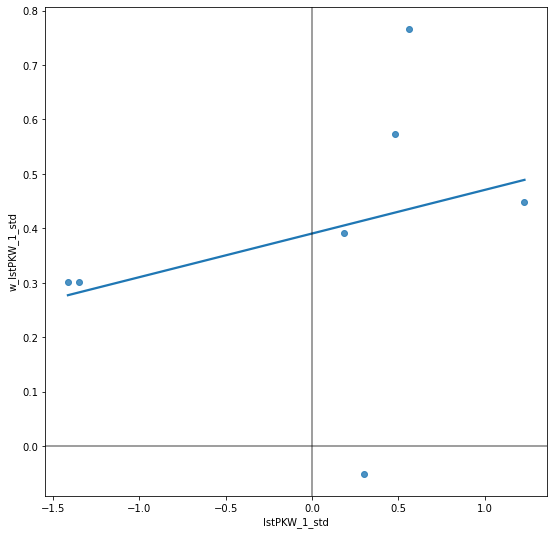

In [64]:
# Setup the figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot values
sns.regplot(x='IstPKW_1_std', y='w_IstPKW_1_std', data=df_grouped, ci=None)
# Add vertical and horizontal lines
plt.axvline(0, c='k', alpha=0.5)
plt.axhline(0, c='k', alpha=0.5)
# Display
plt.show()

In [65]:
mi = esda.Moran(df_grouped['IstPKW_1'], w)

In [66]:
mi.I

0.08011732016054332

In [67]:
mi.p_sim

0.154

### Spatial Autocorrealtion